# Нейронная сеть, которая решает задачу регрессии

Задача регрессии - это предсказание некоторого вещественного числа

задача состоит в том, что нужно понять как предсказать функцию sin(y)

In [ ]:
%matplotlib inline
# указывает, что график необходимо построить в оболочке Jupyter,
# но теперь он выводится как обычная картинка

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0) # размер графика

import torch

# Train dataset

Text(0.5, 1.0, '$y = sin(x)$')

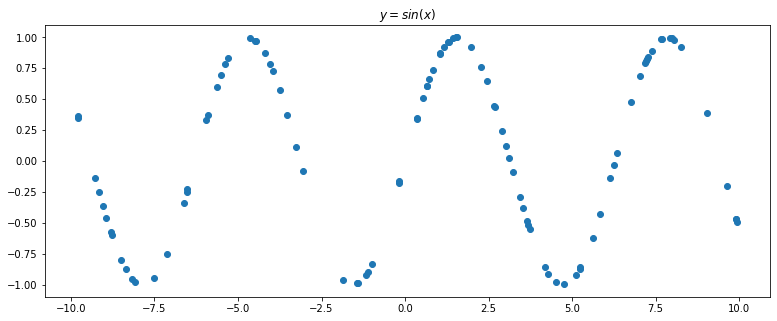

In [ ]:
# нужно составить тренировочные данные
x_train = torch.rand(100) # возьмем точки из равномерного распределения (от 0 до 1) 100 штук
x_train = x_train * 20.0 - 10.0 # над каждой точкой произведем вычисления, чтобы график был примерно  по центру

y_train = torch.sin(x_train) # y будут синусы от точек x

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')

Text(0.5, 1.0, 'Gaussian noise')

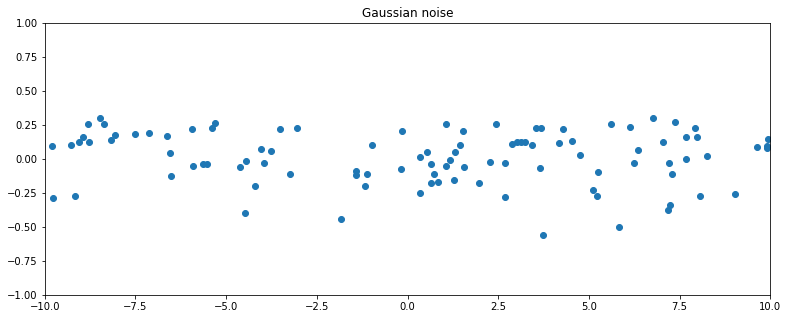

In [ ]:
# добавим шумов в обучающую выборку
# шум будет из нормального распределения

noise = torch.randn(y_train.shape) / 5

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

Text(0, 0.5, 'y_train')

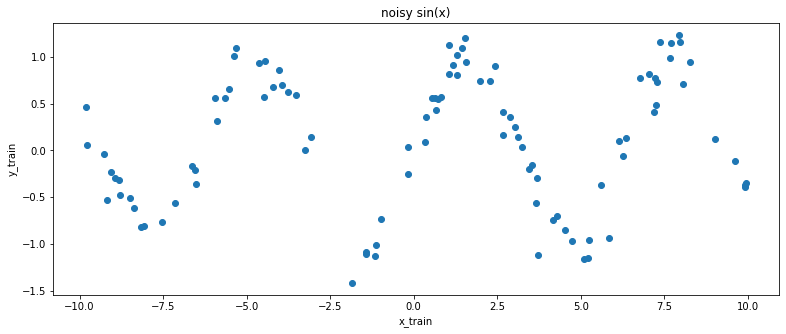

In [ ]:
y_train = y_train + noise # добавляем шум к каждой точке предыдущего графика

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [ ]:
# когда мы будем передавать в нейросеть данные, хочется, чтобы они были правильной размерности
# т.к. признаком объекта может быть не одно число (как у нас( координата x, по которой мы
# хотим предсказать y)), а сразу несколько
#
# Соответственно, для общности, нужно наш вектор x (который сейчас строчка) превратить в столбец

x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[ 9.2396e-02],
        [-4.1263e-02],
        [-3.5384e-01],
        [ 1.0970e+00],
        [-3.8754e-01],
        [-5.2630e-01],
        [ 9.5466e-01],
        [ 9.8371e-01],
        [-1.0808e+00],
        [ 3.1717e-01],
        [ 4.8365e-01],
        [ 3.2602e-02],
        [-5.6018e-01],
        [-2.0997e-01],
        [ 5.4473e-01],
        [-1.1631e-01],
        [ 1.2015e+00],
        [ 1.1564e+00],
        [ 1.3143e-01],
        [-9.3544e-01],
        [ 5.5468e-01],
        [-1.0102e+00],
        [ 1.2264e+00],
        [-3.5028e-01],
        [ 2.4565e-01],
        [-8.0196e-01],
        [-1.1071e+00],
        [ 5.6553e-01],
        [ 4.2925e-01],
        [ 8.1535e-01],
        [ 8.5735e-01],
        [-2.3468e-01],
        [ 6.2867e-01],
        [-9.5230e-01],
        [ 6.7588e-01],
        [ 5.7079e-01],
        [ 1.0139e+00],
        [ 1.6857e-01],
        [-1.4918e-04],
        [-6.3198e-02],
        [ 6.9789e-01],
        [ 3.6103e-01],
        [-1.1532e+00],
        [ 1

In [ ]:
# посмотрим как этот метод работает
tmp = torch.Tensor([1, 2, 3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


# Validation dataset

Text(0, 0.5, 'y_validation')

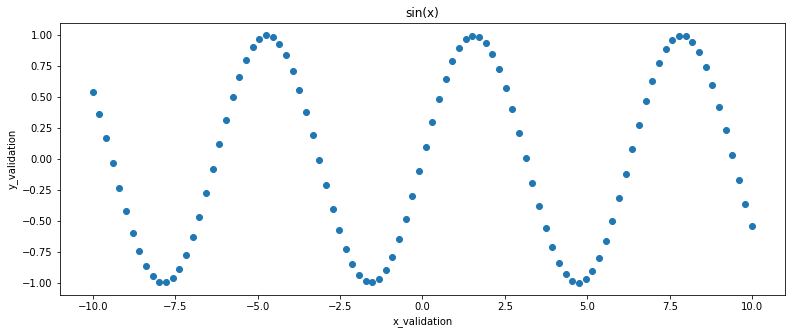

In [ ]:
# кроме train dataset нам нужен будет validation dataset
#
# Здесь мы знаем, что закон природы, который сгененрировал наши данные - функция синуса
# Поэтому в validation data мы возьмем просто функцию синуса без шумов

x_validation = torch.linspace(-10, 10, 100) # 100 точек от -10 до 10
y_validation = torch.sin(x_validation.data)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

In [ ]:
# мы эти данные будем передавать в сетку, поэтмоу они должны выглядеть столбцом
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

# Model construction

In [ ]:
# чтобы создать нейронную сеть, нужно создать класс
class SineNet(torch.nn.Module): # класс наследует модуль torch.nn.Module
  def __init__(self, n_hidden_neurons): # инициализируем слои, которые будут использоваться
                                        # n_hidden_neurons - кол-во скрытых нейронов, которые
                                        # будут храниться в каждом слое
    super(SineNet, self).__init__() #инициализируем родительский объект

    # создадим слои
    # fully connected - полноссвзяный - linear
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons) # кол-во входных и выходных нейронов
    # функция активации - сигмойда
    self.act1 = torch.nn.Sigmoid()
    # еще один полносвязный слой, у него будет 1 нейрон, это будет нашим ответом
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

  # функция, где наши слои последовательно применяются
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

sine_net = SineNet(50) # объект класса, 50 скрытых нейронов

попробуем предсказать без обучения

# Prediction

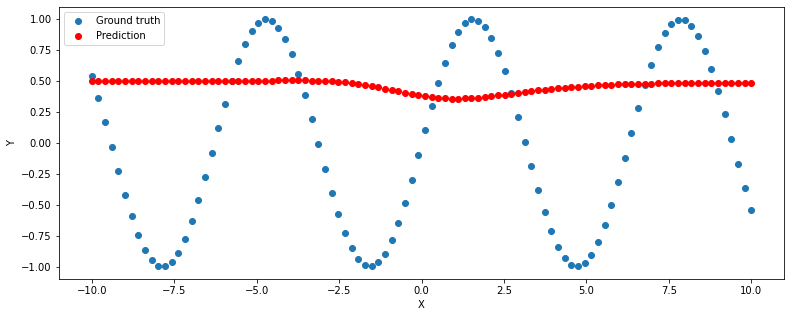

In [ ]:
def predict(net, x, y):
  y_pred = net.forward(x) # функция, где наши слови последовательно применяются

  plt.plot(x.numpy(), y.numpy(), 'o', label = 'Ground truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c = 'r', label = 'Prediction')
  plt.legend(loc = 'upper left')
  plt.xlabel('X')
  plt.ylabel('Y')

predict(sine_net, x_validation, y_validation)

давайте теперь обучим нашу нейросеть, для начала нам нужен будет оптимизатор, который будет выполнять шаги градиентного спуска
# Optimizer

In [ ]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr = 0.01) #adam вместо sgd
# в адам передаются параметры, которые мы хотим обучить в нейронной сети
# можно подумать, что это x но это не так, потому что x - это наши точки, на которык
# мы не можем повлиять. Зато мы можем повлиять на веса нейронной сети, те веса,
# которые храняться в нейронах, они находятся в sine_net.parametrs()

# передвавая этот параметр в адам, он поймет, что там лежат те переменные, которые
# он может модифицировать вследствии градиентного спуска

# lr - learning rate - шаг градиентого спуска

Кроме оптимизатора, нам нужна функция потерь, которая говорит, насколько мы ошиблись и не правильно предсказали

По этой функции будет происходить вычисление градиента и она будет учавствовать в градиентном спуске
# Loss function

In [ ]:
def loss(pred, target):
  squares = (pred - target) ** 2 # pred - предсказания, target - реальное значение точки
  return squares.mean()

# Training procedure

Если мы возьмем наш датасет и прогоним его через нейронную сеть получив некоторые предсказания. После, на этих предсказаниях посчитаем функцию потерь, потом посчитаем у этой функции производную и сделаем градиентный шаг - это будет называться эпохой  

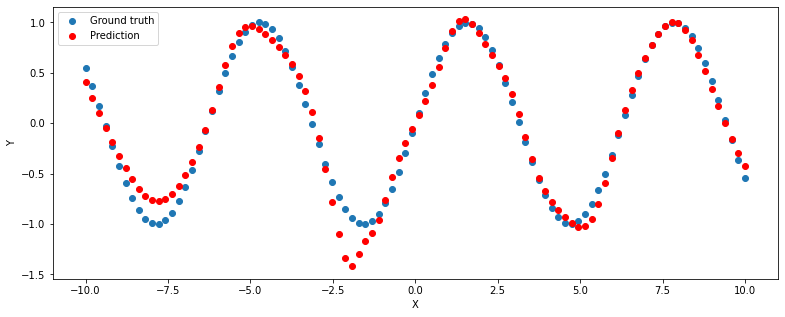

In [ ]:
for epoch_index in range(2000): # берем 2000 эпох
  optimizer.zero_grad() # зануляем градиенты, т.к. они копят в себе сумму

  y_pred = sine_net.forward(x_train) # передаем наш обучающий датасет, считаем предсказания
  loss_val = loss(y_pred, y_train) # считаем функцию потерь, получаем число - это будет скаляр
                                   # это некоторый тензор, который зависит от весов нейросети,
                                   # который обернут в оптимайзер

  loss_val.backward() # по полученному скаляру вычисляем производные, оптимайзер понимает, что
                      # там посчитались градиенты и значит он может сделать шаг

  optimizer.step() # делаем градиентный шаг

predict(sine_net, x_validation, y_validation)

In [ ]:
# задание 1
import torch


class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super().__init__()
        # put our code here
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        # put our code here
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x


sine_net = SineNet(int(input()))
sine_net.forward(torch.Tensor([1.]))

print(sine_net)

20
SineNet(
  (fc1): Linear(in_features=1, out_features=20, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=20, out_features=1, bias=True)
)


0.020145626738667488


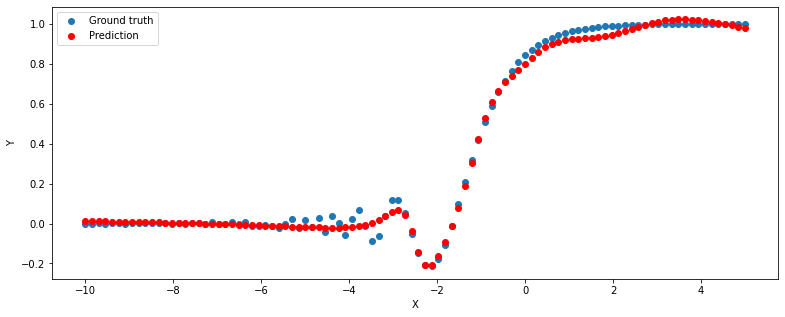

In [ ]:
# задание 2
import torch

def target_function(x):
    return 2**x * torch.sin(2**-x)

class RegressionNet(torch.nn.Module):
    # your code here
    def __init__(self, n_hidden_neurons):
      super(RegressionNet, self).__init__()

      self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
      self.act1 = torch.nn.Sigmoid()
      self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
      x = self.fc1(x)
      x = self.act1(x)
      x = self.fc2(x)
      return x

net = RegressionNet(10)

# ------Dataset preparation start--------:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset preparation end--------:


optimizer = torch.optim.Adam(net.parameters(), lr=0.1)

def loss(pred, target):
    # your code here
    absolute = torch.abs(pred - target)
    return absolute.mean()

for epoch_index in range(2500):
    optimizer.zero_grad()

    y_pred = net.forward(x_train) # make forward
    loss_value = loss(y_pred, y_train)
    # make backward
    loss_value.backward()
    # make step
    optimizer.step()

# Проверка осуществляется вызовом кода:
def metric(pred, target):
   return (pred - target).abs().mean()

print(metric(net.forward(x_validation), y_validation).item())
predict(net, x_validation, y_validation)
# (раскомментируйте, если решаете задание локально)